# Iris Playground
### Instructors: Vagelis Papalexakis, Yorgos Tsitsikas
### Code and Responses: Amirsadra Mohseni
### University of California, Riverside

In this notebook, we will explore a dataset, visualizing the dataset in various ways, and doing a preliminary analysis on the data. 

For this project, we are going to use the functionality of Pandas ( https://pandas.pydata.org/ ) in order to manipulate datasets.
In addition to Pandas, we are going to use Matplotlib ( https://matplotlib.org/ ) and Numpy ( http://www.numpy.org/ ) and maybe Seaborn ( https://seaborn.pydata.org/ ) for some data visualization.

Before you start, make sure you have installed all those packages in your local Jupyter instance, as follows:

conda install numpy pandas matplotlib seaborn

## Academic Integrity
If you have arrived at this repo and found my code, so can your professor. Professors have seen hundreds of projects and their source code. It doesn't take them much time to recognize what you are presenting as your own was actually made by someone else. If you wish to cite my source code, please ask your supervisor about the policies of doing so.


In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sb
import random

## 0. Getting the Data

We are going to use data from the UCI Machine Learning repository ( https://archive.ics.uci.edu/ml/index.php ). In particular, we are going to use the famous Iris dataset: https://archive.ics.uci.edu/ml/datasets/Iris


In [2]:
data_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']
data = pd.read_csv('iris.data', names = data_names)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 1. Data Visualization

### Section 1a: Scatterplots - Objectives:
1. Plot the scatterplot of all pairs of features and color the points by class label
2. Which pair of features is (visually) the most correlated?
3. Why looking at this plot would be useful in a task where we would have to classify flowers by label?

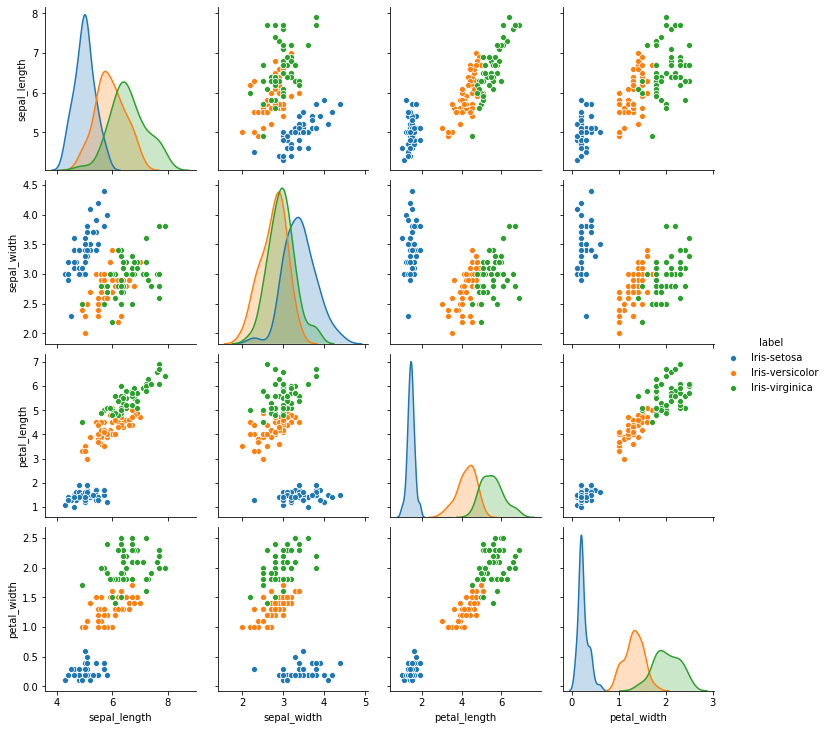

In [3]:
# Color mapping code from https://stackoverflow.com/a/42384539/5607713
#color_map = ["red" if flower == "Iris-setosa" else "green" if flower == "Iris-versicolor" else "blue" for flower in data.label]

# Scatter plot doc from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html
#pd.plotting.scatter_matrix(data, alpha = 0.2, color = color_map);

#data.plot.scatter(x = "sepal_length", y = "sepal_length", c = color_map)
#data.plot.scatter(x = "sepal_length", y = "sepal_width", c = color_map)
#data.plot.scatter(x = "sepal_length", y = "petal_length", c = color_map)
#data.plot.scatter(x = "sepal_length", y = "petal_width", c = color_map)

#data.plot.scatter(x = "sepal_width", y = "sepal_width", c = color_map)
#data.plot.scatter(x = "sepal_width", y = "petal_length", c = color_map)
#data.plot.scatter(x = "sepal_width", y = "petal_width", c = color_map)

#data.plot.scatter(x = "petal_length", y = "petal_length", c = color_map)
#data.plot.scatter(x = "petal_length", y = "petal_width", c = color_map)

#data.plot.scatter(x = "petal_width", y = "petal_width", c = color_map)

# Or just use this single seaborn function...
sb.pairplot(data, hue = 'label')

2. Aside from identical pairs (e.g, petal width and petal width), petal width and petal length seem to be the most correlated because the plotted data is mostly linear and we can define boundries that distinguish the flower type based on where their petal width and length measurements fall on the scatter plot/

3. By looking at a certain pair of features (e.g, petal width and petal length which are the most correlated pair) we can make an educated guess about the type of the flower when we are given a pair of petal width and length measurements. In other words, if we are given a petal width-length pair of say, (0.25, 1.5), we can guess that the flower is of type Iris Setosa since those features fall on the bottom left side of our scatter plot similar to other Iris Setosa.

### Section 1b: Boxplot and Histogram - Objectives:

1. Plot the boxplot for each feature of the dataset
2. Plot the histogram only for petal length
3. Does the histogram for petal length give more information than the boxplot?

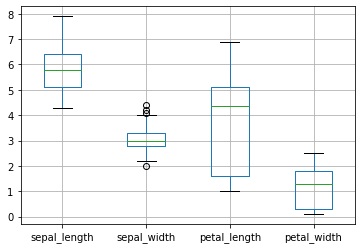

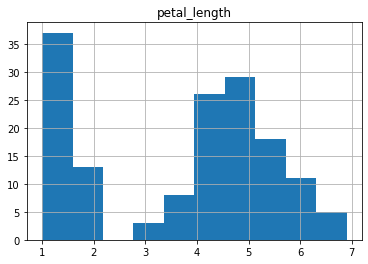

In [4]:
data.boxplot();
data.hist("petal_length");

3. The histogram tells us that we have more than 1 mode of data. We can observe from the histogram that most petals have a length of about 1.25 or somewhere between 4 to 5. The histogram also tells us that almost none of the petals are of lengths between 2 and 3. The boxplot tells us where most of the data lies. However, it doesn't tell us anything about how many modes or classes of data there are.

## 2. Distance computation



### Section 2a: Implement the Lp distance function from Scratch
1. Write code that implements the Lp distance function between two data points
2. Verify that it is correct by comparing it for p=2 against an existing implementation in Numpy for the two selected data points below. Note that the difference of the distances may not be exactly 0 due to numerical precision issues.

In [5]:
# https://en.wikipedia.org/wiki/Minkowski_distance
def minkowski(x, y, p):
    zipped = zip(x, y)          # Map the similar indices of vectors x and y.
                                # Example input: x = [1, 2, 3] y = [4, 5, 6] zipped returns an iterator that has mapped
                                # (1, 4), (2, 5), and (3, 6)
    l = []
    for x_i, y_i in zipped:
        if (not isinstance(x_i, str) and not isinstance(y_i, str)):
            l.append(pow(abs(x_i - y_i), p))                # For each pair of mapped vector elements,
                                                            # take the abs val of the difference of
                                                            # each zipped pair and raise them to the power of p
    return (pow(sum(l), 1 / p))


sample_1 = [5.4, 3.4, 1.7, 0.2] #5.4,3.4,1.7,0.2,Iris-setosa
sample_2 = [6.9, 3.2, 5.7, 2.3] #6.9,3.2,5.7,2.3,Iris-virginica

print("Custom Lp distance method: %3.2f" %(minkowski(sample_1, sample_2, 2)))
print("Numpy Lp Norm method: %3.2f" %np.linalg.norm(np.array(sample_1) - np.array(sample_2), 2))

Custom Lp distance method: 4.76
Numpy Lp Norm method: 4.76


### Section 2b: Compute the distance matrix between all data points
1. Compute an $N\times N$ distance matrix between all data points (where $N$ is the number of data points)
2. Plot the above matrix and include a colorbar
3. What is the minimum number of distance computations that we can do in order to populate every value of this matrix? 
4. Note that the data points in your dataset are sorted by class. What do you observe in the distance matrix?

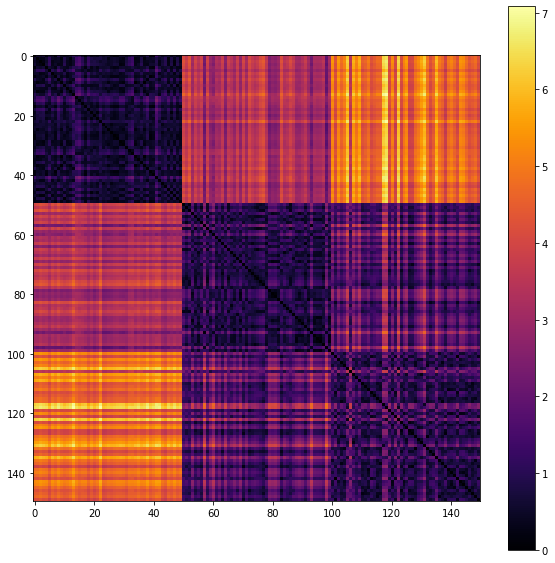

In [6]:
def distance_matrix(stream, round_to):
    values = stream.values
    matrix = []
    
    for i in values:
        row = []
        
        for j in values: 
            distance = round(minkowski(i, j, 2), round_to)
            row.append(distance)
            
        matrix.append(row)
        
    return np.array(matrix)

distance_matrix = distance_matrix(data, 4)

mpl.pyplot.figure(1, figsize = (10, 10))
mpl.pyplot.imshow(distance_matrix, cmap = 'inferno')
mpl.pyplot.colorbar()
mpl.pyplot.show()

In [7]:
print(round(distance_matrix[20][120],2))

4.76


3. Since the matrix is symmetric, we do not have to compute all the values. We can simply computer the values on one side of the diagonal. Since the diagonal represents the distance of points with themselves, we don't need to calculate the diagonal either. The minimum computations would be N^2 or 150 by 150 = 22500 - 150 = 22350 values.

4. Each box in the symmetric distance matrix represents the distance between the data points of a certain flower species. For example, top right box (bright yellow) represents the distance between the values of the first 50 flowers (Iris-setosa) and the last 50 flowers (Iris-virginica). The diagonal is a black line which represents the distance between a data point with itself, which is zero. The dark boxes around the diagonal represent the distance values between data points (flowers) within the same species (data points from 0 to 50, 51 to 100, and 101 to 150).

## 3. Data Sampling

Sometimes datasets are too big, or come in a streaming fashion, and it is impossible for us to process every single data point, so we have to resort to sampling methods. In this section, we will implement the popular "reservoir sampling" method, which is mostly used to obtain a uniform random sample of a data stream. Subsequently, we will experiment with sampling directly all the data and conducting stratified sampling (by class label) and observe the results in the data distribution.

### Section 3a: Reservoir Sampling - Objectives:
1. Implement reservoir sampling.
2. Run reservoir sampling with reservoir size $M = 15$ and plot the histogram of the petal length feature for the sampled dataset

In [8]:
def reservoir_sampler(stream, M):
    res = [0] * M
    rows = stream.shape[0]
    
    for i in range(M):
        res[i] = stream.iloc[i]
        
    for i in range(M, rows):
        j = random.randrange(1, i)
        
        if (j < M):
            res[j] = stream.iloc[i]
            
    return res

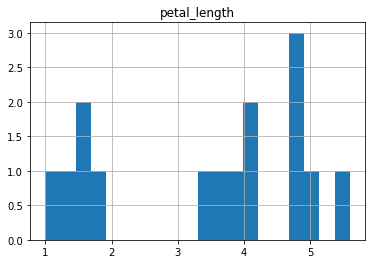

In [12]:
res = pd.DataFrame(reservoir_sampler(data, 15))

res.hist("petal_length", bins=20);

#res.sort_values("petal_length").head(15)

### Section 3b: Stratified Sampling - Objectives:
1. Implement stratified sampling by class label, and within each stratum use the reservoir sampling function we implemented.
2. Run the stratified sampler with $M=5$ samples per class (so that we have 15 data points in total) and plot the histogram of the petal length feature for the sampled dataset 
3. Do you observe any difference between the stratified and the non-stratified histograms? Which one resembles the original petal length distribution more closely? In order to answer this question we may want to run both sampling procedures a few times and observe which one gives a more accurate result on average. 

In [13]:
'''
Author: Amirsadra Mohseni (myself)

Function requirement: The reservoir_sampler function, dataframe to sample from, a series object (may be 
                        a class/label column from the dataframe), and total sample size
Function purpose:
    Given a dataframe, a series object that represents the population, and a total desired sample size,
    return a list of dataframes containing random samples from each stratum. The function calculates 
    using (size of the stratum = size of entire sample / population size * layer size)
    the appropriate number of samples required from each stratum, and calls reservoir_sampler with that
    sample size.
    It finally returns a list of dataframes. Each index of this list represents the appropriate number
    of samples from each class.
    
    Example usage:
        df_list = stratified_sampler(data, data["label"], 15)
        df_list[0].head()
        df_list[1].head()...
'''

def stratified_sampler(stream, class_column, sample_size_total):
    total_count = class_column.shape[0]
    class_count = class_column.value_counts()
    class_name_count_dict = dict(zip(class_count.keys().tolist(), class_count.tolist()))
    
    df_list = []
    
    for key in class_name_count_dict:
        
        # Find size of the stratum
        sample_size = int(sample_size_total / total_count * class_name_count_dict[key])
        
        # Within each stratum, use the reservoir sampler
        df_list.append(pd.DataFrame(reservoir_sampler(stream.loc[stream[class_column.name] == key], sample_size)))
    
    return df_list

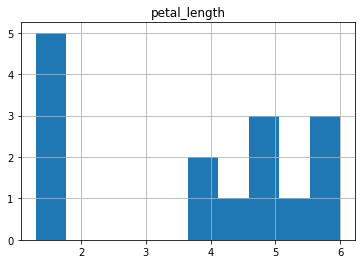

In [14]:
df_list = stratified_sampler(data, data["label"], 15)
frames = pd.concat(df_list)
frames.hist("petal_length");

In [15]:
df_list[0].head()

,sepal_length,sepal_width,petal_length,petal_width,label
100,6.3,3.3,6.0,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
138,6.0,3.0,4.8,1.8,Iris-virginica


In [16]:
df_list[1].head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
38,4.4,3.0,1.3,0.2,Iris-setosa
42,4.4,3.2,1.3,0.2,Iris-setosa
49,5.0,3.3,1.4,0.2,Iris-setosa
21,5.1,3.7,1.5,0.4,Iris-setosa


In [17]:
df_list[2].head()

,sepal_length,sepal_width,petal_length,petal_width,label
50,7.0,3.2,4.7,1.4,Iris-versicolor
81,5.5,2.4,3.7,1.0,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
75,6.6,3.0,4.4,1.4,Iris-versicolor
89,5.5,2.5,4.0,1.3,Iris-versicolor


3. The stratified sampler better resembled the actual distribution of data without having to take the entire data into account. In other words, instead of analysing the entire 150 flowers in our dataset, we can closely and approximately represent the data by sampling only 10% of it. Below, you can see the actual distribution of petal length values versus the sampled example.

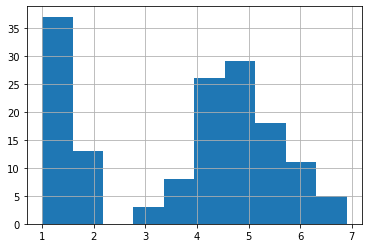

In [18]:
# Histogram of 150 values
data["petal_length"].hist();

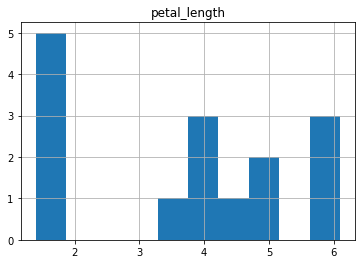

In [19]:
# Histogram of only 15 samples across the data
# Note how this graph better resembles the actual data distrubution compared
# to only using the reservoir sampler below.
frame = pd.concat(stratified_sampler(data, data["label"], 15))
frame.hist("petal_length");

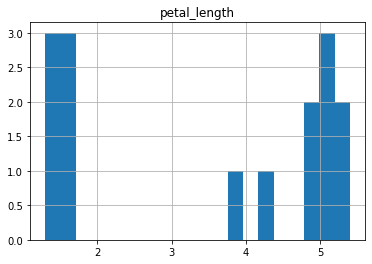

In [20]:
# Reservoir sampler with 15 samples
res = pd.DataFrame(reservoir_sampler(data, 15))
res.hist("petal_length", bins=20);

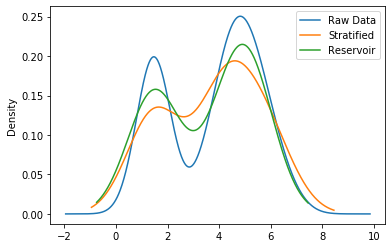

In [21]:
frame = pd.DataFrame({
    "Raw Data": data["petal_length"],
    "Stratified": frame["petal_length"],
    "Reservoir" : res["petal_length"]
})

ax = frame.plot.kde()